In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\hopeh\Desktop\data_science_bootcamp\flight_times_capstone\preprocessing1erasdates.csv", low_memory=False)


In [5]:
df.columns


Index(['Unnamed: 0', 'day_of_week', 'date', 'op_carrier_fl_num',
       'crs_dep_time', 'dep_time', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'cancelled', 'diverted',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'distance_group', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_aircraft_delay', 'origin_latitude',
       'origin_longitude', 'dest_latitude', 'dest_longitude', 'airport_ref',
       'elevation_ft', 'unique_id', 'id', 'length_ft', 'width_ft', 'lighted',
       'closed', 'le_ident', 'le_displaced_threshold_ft', 'he_ident',
       'he_displaced_threshold_ft', 'delay_columns', 'total_delay_time',
       'flight_delay_time', 'week_of_year', 'delay_time_min', 'arr_time_HHMM',
       'crs_arr_time_HHMM', 'delay_in_min', 'year', 'month', 'day',
       'is_tour_date', 'is_nfl_game_day', 'has_delay'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,day_of_week,date,op_carrier_fl_num,crs_dep_time,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,...,delay_time_min,arr_time_HHMM,crs_arr_time_HHMM,delay_in_min,year,month,day,is_tour_date,is_nfl_game_day,has_delay
0,-1.732050,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
1,-1.732050,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
2,-1.732049,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
3,-1.732048,-1.465133,2023-05-01,1.741760,-0.240441,-0.248312,-0.425851,-0.258242,-0.248803,-0.16580,...,-0.257886,0,0,-0.140623,0.0,-1.272476,-1.577464,0,False,1
4,-1.732047,-1.465133,2023-05-01,1.901145,0.783449,0.741602,-0.207042,0.727686,0.702153,0.11582,...,-0.257886,0,0,-0.087922,0.0,-1.272476,-1.577464,0,False,1


In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values (if the column is unimportant or the missing percentage is small)
df = df.dropna()  # Or you can drop specific columns with high missing data

# Impute missing values in numerical columns with median (for robustness)
df['carrier_delay'] = df['carrier_delay'].fillna(df['carrier_delay'].median())
df['weather_delay'] = df['weather_delay'].fillna(df['weather_delay'].median())
df['nas_delay'] = df['nas_delay'].fillna(df['nas_delay'].median())
df['security_delay'] = df['security_delay'].fillna(df['security_delay'].median())
df['late_aircraft_delay'] = df['late_aircraft_delay'].fillna(df['late_aircraft_delay'].median())


In [ ]:

# Impute missing values in categorical columns with the mode (most frequent value)
df['day_of_week'] = df['day_of_week'].fillna(df['day_of_week'].mode()[0])
df['op_carrier_fl_num'] = df['op_carrier_fl_num'].fillna(df['op_carrier_fl_num'].mode()[0])


In [11]:
# Handle Categorical Variables

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for ordinal categorical columns like 'day_of_week'
label_encoder = LabelEncoder()
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])

# One-Hot Encoding for nominal categorical columns like 'op_carrier_fl_num', 'month'
df = pd.get_dummies(df, columns=['op_carrier_fl_num', 'month'], drop_first=True)



In [13]:
# Convert time columns to datetime format (if not already in datetime format)
df['crs_dep_time'] = pd.to_datetime(df['crs_dep_time'], format='%H%M', errors='coerce')
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H%M', errors='coerce')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'], format='%H%M', errors='coerce')
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H%M', errors='coerce')

# Extract features like hour, minute, day of week, etc.
df['crs_dep_hour'] = df['crs_dep_time'].dt.hour
df['crs_dep_minute'] = df['crs_dep_time'].dt.minute
df['dep_hour'] = df['dep_time'].dt.hour
df['dep_minute'] = df['dep_time'].dt.minute
df['crs_arr_hour'] = df['crs_arr_time'].dt.hour
df['crs_arr_minute'] = df['crs_arr_time'].dt.minute
df['arr_hour'] = df['arr_time'].dt.hour
df['arr_minute'] = df['arr_time'].dt.minute

# Add time-based features like is_weekend, is_morning, is_afternoon, etc.
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Saturday = 5, Sunday = 6
df['is_morning'] = (df['crs_dep_hour'] < 12).astype(int)  # Flights before 12pm
df['is_afternoon'] = ((df['crs_dep_hour'] >= 12) & (df['crs_dep_hour'] < 18)).astype(int)
df['is_evening'] = (df['crs_dep_hour'] >= 18).astype(int)


In [17]:
# Drop irrelevant columns
df.drop(['Unnamed: 0', 'unique_id', 'id', 'airport_ref', 'le_ident'], axis=1, inplace=True)


In [ ]:
from scipy.sparse import csr_matrix

# Convert the numeric columns to a sparse matrix format
df_numeric_sparse = csr_matrix(df_numeric)

# Now compute the correlation matrix on the sparse matrix
correlation_matrix = pd.DataFrame(df_numeric_sparse.toarray()).corr()


Final Data Cleaning Summary
After these steps, data is cleaned and ready for modeling. 

Here's a summary of the main actions:
Missing values: Imputed numerical columns (e.g., delay times) with the median, and categorical columns with the mode.
Categorical variables: Encoded day_of_week with label encoding and other categorical columns with one-hot encoding.
Time variables: Converted time columns into hours and minutes, and added additional time-based features (e.g., is_weekend, is_morning).
Dropped irrelevant columns: Removed columns that don’t contribute to the model’s predictive power.

For regression tasks (predicting the delay time), we can perform a correlation analysis to see which features are strongly correlated with the target variable (e.g., delay_in_min, total_delay_time, or flight_delay_time). We can also remove highly correlated features to avoid multicollinearity.

In [33]:
# Take a random sample of 10% of the rows (adjust as needed)
df_sample = df.sample(frac=0.1, random_state=42)

# Compute correlation matrix on the sample
correlation_matrix = df_sample.corr()


C:\Users\hopeh\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\hopeh\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


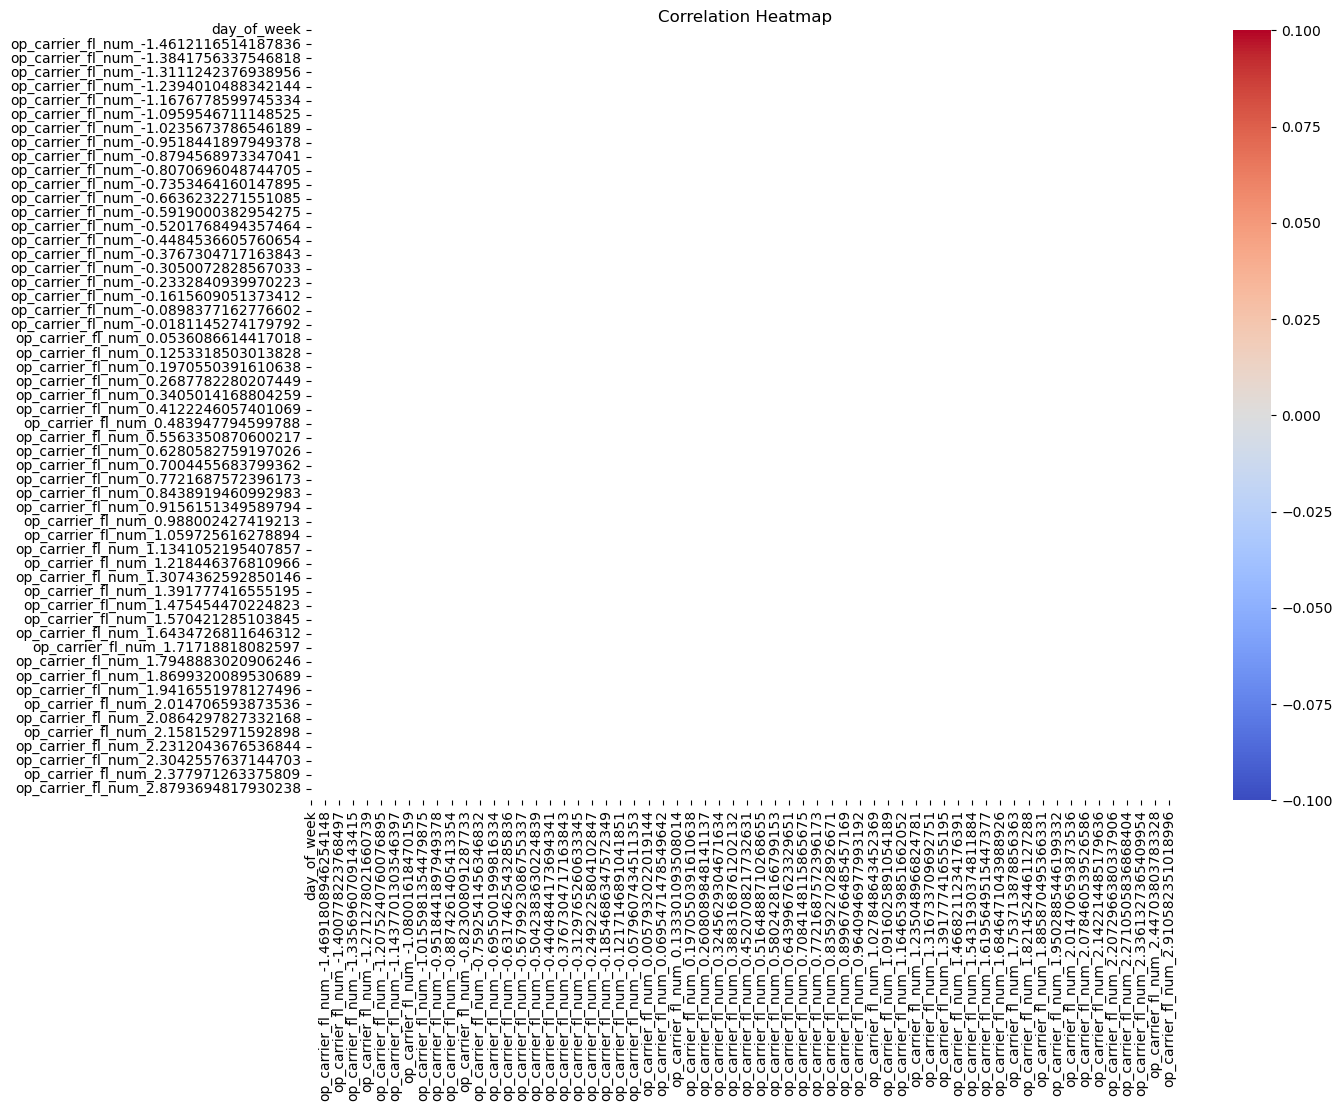

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix to identify strong correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated features (threshold > 0.8, for example)
corr_threshold = 0.8
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print(f"Highly correlated features: {high_corr_features}")


In [ ]:
# Calculate and plot correlation matrix after applying optimizations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated features
corr_threshold = 0.8
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print(f"Highly correlated features: {high_corr_features}")


In the correlation heatmap:

Strong correlations (values near 1 or -1) may indicate features that carry redundant information.
Drop one of each pair of highly correlated features to reduce redundancy.

 Feature Importance (for both classification and regression)
We can use models like Random Forest to assess feature importance. Random Forest has a built-in mechanism to evaluate how important each feature is for predicting the target variable.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Choose target variable for classification or regression
# For classification (has_delay), use RandomForestClassifier
# For regression (delay_in_min), use RandomForestRegressor

# For classification
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# For regression (if you are predicting delay times)
# model_rf = RandomForestRegressor(random_state=42)
# model_rf.fit(X_train, y_train)

# Get feature importances
importances = model_rf.feature_importances_

# Sort features by importance
sorted_idx = importances.argsort()

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(df.columns[sorted_idx], importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


Interpret the plot: Features with higher importance should be kept, and those with low importance can be dropped to improve model performance and reduce overfitting.

Removing Redundant and Low-Variance Features
If some features have little variance (i.e., they don’t change much across the dataset), they may not contribute significantly to the model’s performance. You can remove those features.

In [ ]:
# Train Classification Models to Predict Flight Delay Time


# Linear Regression (for predicting delay time)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear Regression Model
model_lr_reg = LinearRegression()
model_lr_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr_reg = model_lr_reg.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr_reg)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_reg))

print(f"Linear Regression - MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}")


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Model for predicting delay time
model_rf_reg = RandomForestRegressor(random_state=42)
model_rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf_reg = model_rf_reg.predict(X_test)

# Evaluate
mae_rf_reg = mean_absolute_error(y_test, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mean_squared_error(y_test, y_pred_rf_reg))

print(f"Random Forest Regressor - MAE: {mae_rf_reg:.4f}, RMSE: {rmse_rf_reg:.4f}")


Hyperparameter Tuning